In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
rng = np.random.default_rng(7)

In [57]:
num_agents = 10 
T = 5
num_topics = 2
R = 0.3 # confidence bound

In [8]:
def get_A(opinions,R):
    '''
    A function to return the average opinion within R of each opinion in a vector of opinions
    '''
    
    # Create a square matrix consisting of the opinions vector repeated num_of_agents times
    opinions_repeated = np.array([opinions]*len(opinions))
    # Create matrix of boolean values indicating which opinions are within R of each opinion
    mask = abs(opinions_repeated - opinions_repeated.T) < R
    
    # Initialise averages matrix
    A = np.zeros(num_of_agents)

    # Loop over agents
    for i in range(num_of_agents):
        # Get average of opinions within R of opinion
        A[i] = np.mean(opinions[mask[i,:]])
        # print(A[i])
    
    return(A)

In [9]:
# init all agents to [0,1]
opinions_1 = np.random.rand(num_of_agents) 
opinions_2 = np.random.rand(num_of_agents) 

In [60]:
X  = np.random.rand(num_agents * T * num_topics).reshape((T, num_topics, num_agents))
X

array([[[0.5908527 , 0.15157476, 0.54876993, 0.9800725 , 0.41949924,
         0.95117413, 0.35819381, 0.15995595, 0.52092394, 0.12926723],
        [0.62073396, 0.79949917, 0.14698991, 0.8820206 , 0.27118182,
         0.13987109, 0.45119047, 0.53052403, 0.75826793, 0.8405005 ]],

       [[0.89733038, 0.5246515 , 0.3414215 , 0.14794285, 0.28223837,
         0.08881831, 0.29660586, 0.80102894, 0.57878969, 0.35573655],
        [0.25996922, 0.05581787, 0.62055059, 0.87147491, 0.94589794,
         0.10558401, 0.11256055, 0.95959363, 0.07150147, 0.77687777]],

       [[0.52111473, 0.62482336, 0.55776272, 0.83167665, 0.76846319,
         0.26411132, 0.86916044, 0.34239287, 0.04258767, 0.26017526],
        [0.18566136, 0.65310656, 0.70931919, 0.80048133, 0.72570594,
         0.05709897, 0.75970497, 0.77252828, 0.88679128, 0.49361871]],

       [[0.88598249, 0.86597439, 0.61824761, 0.1273596 , 0.41105159,
         0.41994487, 0.51574803, 0.93258021, 0.51313733, 0.41768097],
        [0.16369473, 

In [68]:
X[2,1,:]

array([0.18566136, 0.65310656, 0.70931919, 0.80048133, 0.72570594,
       0.05709897, 0.75970497, 0.77252828, 0.88679128, 0.49361871])

In [69]:
for t in range(T-1):
    for topic in range(num_topics):
        X[t+1,topic,:] = get_A(X[t,topic,:],R)

In [79]:
X[:,0,:].T

array([[0.5908527 , 0.48764792, 0.36422472, 0.36422472, 0.36422472],
       [0.15157476, 0.2436982 , 0.36422472, 0.36422472, 0.36422472],
       [0.54876993, 0.48764792, 0.36422472, 0.36422472, 0.36422472],
       [0.9800725 , 0.96562332, 0.96562332, 0.96562332, 0.96562332],
       [0.41949924, 0.3598797 , 0.36422472, 0.36422472, 0.36422472],
       [0.95117413, 0.96562332, 0.96562332, 0.96562332, 0.96562332],
       [0.35819381, 0.3598797 , 0.36422472, 0.36422472, 0.36422472],
       [0.15995595, 0.2436982 , 0.36422472, 0.36422472, 0.36422472],
       [0.52092394, 0.48764792, 0.36422472, 0.36422472, 0.36422472],
       [0.12926723, 0.2436982 , 0.36422472, 0.36422472, 0.36422472]])

In [80]:
np.arange(T)

array([0, 1, 2, 3, 4])

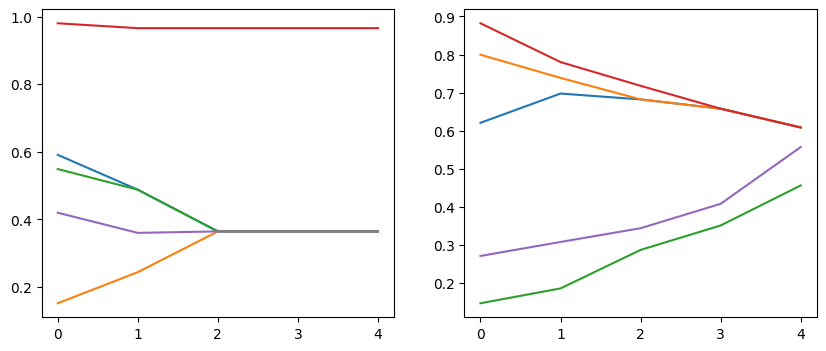

In [87]:
fig, ax = plt.subplots(1,2,figsize=(10,4))

for i in range(T):
    ax[0].plot(np.arange(T), X[:,0,:].T[i])
    ax[1].plot(np.arange(T), X[:,1,:].T[i])

In [ ]:
opinions_1.sort()

# Initialising matrix of opinions over time
opinions_over_time = np.zeros((Timesteps, num_of_agents))
opinions_over_time[0,:] = opinions_1
for t in range(Timesteps-1):
    opinions_over_time[t+1,:] = get_A(opinions_over_time[t,:],R)

opinions_over_time

extremes_high = (opinions_over_time > 0.8)
extremes_low = (opinions_over_time < 0.2)
# extremes = opinions_over_time[mask]

In [ ]:
opinions_2.sort()

# Initialising matrix of opinions over time
opinions_over_time_2 = np.zeros((Timesteps, num_of_agents))
opinions_over_time_2[0,:] = opinions_2
for t in range(Timesteps-1):
    opinions_over_time_2[t+1,:] = get_A(opinions_over_time_2[t,:],R)
opinions_over_time_2

array([6.41055917e-04, 1.20328538e-03, 1.62183576e-03, 3.16025484e-03,
       5.23355503e-03, 5.51617564e-03, 6.04640963e-03, 7.46183742e-03,
       7.79257826e-03, 8.74825335e-03, 9.37539540e-03, 9.74574970e-03,
       1.19439769e-02, 1.22735999e-02, 1.35088088e-02, 1.35198503e-02,
       1.39166569e-02, 1.61815099e-02, 1.98857646e-02, 2.09061649e-02,
       2.22079529e-02, 2.53002763e-02, 2.71927085e-02, 2.88293283e-02,
       2.91391379e-02, 3.07980193e-02, 3.08552861e-02, 3.11093963e-02,
       3.12354584e-02, 3.23272068e-02, 3.34964689e-02, 3.43411838e-02,
       3.45073822e-02, 3.57060865e-02, 3.63357450e-02, 3.66149779e-02,
       3.83029545e-02, 4.01728826e-02, 4.15780341e-02, 4.16166061e-02,
       4.18255082e-02, 4.28655221e-02, 4.40066089e-02, 4.53535847e-02,
       4.69527208e-02, 4.87928812e-02, 4.89425591e-02, 5.41056207e-02,
       5.47197235e-02, 5.51099061e-02, 5.59113885e-02, 5.59176173e-02,
       5.70016705e-02, 5.78823388e-02, 5.96649080e-02, 6.30897225e-02,
      